### In this programming assignment, we will classifiy IMDB reviews into positive and negative reviews.
### We will download the raw IMDB reviews in text format. To convert the words into tensors, we use word embeddings.
### We will first use one of the pre-trained GloVe word embeddings. And then try to improve the embedding.
### To evaluate wether one embedding is better than the other, we use a list of positive words, and a list of negative words. We check how the positive words and negative words are spreaded in an embedding.  Idealy, we want all the positive words to be very close, and all the negative words to be very close in the embedding space, while positive words and negative words be far away from each other. We will define a function to measure how good an embedding is to sperate positive and negative words.
### Using this function, we evaluate the following three embebeddings.
- The glove embedding
- The dense embedding: we use the glove embedding as the initial embbedding and jointly train the embedding and the calssifier using a dense network. We call the resultant embedding the dense embedding.
- The LSTM embedding: we use the glove embedding as the initial embedding and jontly train the embedding and the classifier using a LSTM model. We call the resultant embedding the LSTM embedding.

### From the above three candidates, we choose the best embedding and stack a LSTM layer and a Conv1D layer to build our classifier. We use the dropout to fight overfitting. Our goal is to obtain a classifier that can achieve 90% of accuracy. To achieve this goal, we train the model multiple times by alternatively freezing the embedding layer and other layers.

### Note you only need to fill in part of the code. But you do need to run all the code and generate your own results. Your results could be different from my mine.

In [1]:
from tensorflow import keras
keras.__version__

'2.2.4-tf'

### First we read a list of positive words from a file. Then we read a list of negative words from another file.

In [3]:
filepath = './positive.txt'
L_pos = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_pos.append(line.strip())
        line = fp.readline()
        cnt += 1

for word in L_pos:
    print(word)
print(len(L_pos))

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

In [4]:
filepath = './negative.txt'
L_neg = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_neg.append(line.strip())
        line = fp.readline()
        cnt += 1
for word in L_neg:
    print(word)
print(len(L_neg))

2-faced
2-faces
abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
aller

# Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense "word vectors", also called "word embeddings". 
While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the 
number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). 
Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. 
It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 
On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 
token in this case). So, word embeddings pack more information into far fewer dimensions. 

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). 
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. 
These are called "pre-trained word embeddings". 

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer


The simplest way to associate a dense vector to a word would be to pick the vector at random. The problem with this approach is that the 
resulting embedding space would have no structure: for instance, the words "accurate" and "exact" may end up with completely different 
embeddings, even though they are interchangeable in most sentences. It would be very difficult for a deep neural network to make sense of 
such a noisy, unstructured embedding space. 

To get a bit more abstract: the geometric relationships between word vectors should reflect the semantic relationships between these words. 
Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect 
synonyms to be embedded into similar word vectors, and in general we would expect the geometric distance (e.g. L2 distance) between any two 
word vectors to relate to the semantic distance of the associated words (words meaning very different things would be embedded to points 
far away from each other, while related words would be closer). Even beyond mere distance, we may want specific __directions__ in the 
embedding space to be meaningful. 

[...]


In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For 
instance, by adding a "female vector" to the vector "king", one obtain the vector "queen". By adding a "plural vector", one obtain "kings". 
Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any natural language processing 
task? Possibly, but in any case, we have yet to compute anything of the sort. Also, there isn't such a thing as "human language", there are 
many different languages and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more 
pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an 
English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language 
legal document classification model, because the importance of certain semantic relationships varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, backpropagation makes this really easy, and Keras makes it 
even easier. It's just about learning the weights of a layer: the `Embedding` layer.

## Using pre-trained word embeddings


Sometimes, you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding 
of your vocabulary. What to do then?

Instead of learning word embeddings jointly with the problem you want to solve, you could be loading embedding vectors from a pre-computed 
embedding space known to be highly structured and to exhibit useful properties -- that captures generic aspects of language structure. The 
rationale behind using pre-trained word embeddings in natural language processing is very much the same as for using pre-trained convnets 
in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that 
we need to be fairly generic, i.e. common visual features or semantic features. In this case it makes sense to reuse features learned on a 
different problem.

Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or 
documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space 
for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking 
off in research and industry applications after the release of one of the most famous and successful word embedding scheme: the Word2Vec 
algorithm, developed by Mikolov at Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that can download and start using in a Keras `Embedding` layer. Word2Vec is one 
of them. Another popular one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global Vectors for Word 
Representation", and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made 
available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will of course be valid for Word2Vec 
embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization 
techniques we introduced a few paragraphs ago: we will start from raw text, and work our way up.

## Putting it all together: from raw text to word embeddings


We will be using a model similar to the one we just went over -- embedding sentences in sequences of vectors, flattening them and training a 
`Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in 
Keras, we will start from scratch, by downloading the original text data.

### Download the IMDB data as raw text


First, head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just 
Google "IMDB dataset"). Uncompress it.

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels 
(positive / negative) into a `labels` list:

In [5]:
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [6]:
texts[:2]

["Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
 'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think 

In [7]:
labels[:2]

[0, 0]

In [8]:
len(labels)

25000

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.
We will merely be using the concepts we introduced earlier in this section.

Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, 
task-specific embeddings are likely to outperform them), we will add the following twist: we restrict the training data to its first 200 
samples. So we will be learning to classify movie reviews after looking at just 200 examples...


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500  # We will cut reviews after 500 words
training_samples = 20000  # We will be training on 200 samples
validation_samples = 5000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


Found 88582 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [10]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [11]:
data.shape

(25000, 500)

### Download the GloVe word embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed 
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

### Pre-process the embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [13]:
glove_dir = './glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [14]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Obtain L_POS:
* the list of postive words, where each word is in the embedding, word_index and whose word index is no more than max_word.

Obtain L_NEG: 
* the list of negative words, where each word is in the embedding, word_index and whose word index is no more than max_word.

In [15]:
L_POS = []
for word in L_pos:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_POS.append(word)
L_NEG = []
for word in L_neg:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_NEG.append(word)
len(L_POS), len(L_NEG)

(706, 1163)

Print the top 100 most frequently used positive words from L_POS.

In [16]:
# fill in your code here
P=[]
i=1
while len(P) < 100:
  for word in L_POS:
      if word not in P and word_index[word] <= i:        
          P.append(word)
  i += 1
print(P)

['like', 'good', 'well', 'great', 'best', 'love', 'better', 'work', 'pretty', 'enough', 'right', 'interesting', 'fun', 'worth', 'beautiful', 'excellent', 'nice', 'top', 'classic', 'enjoy', 'recommend', 'wonderful', 'perfect', 'liked', 'entertaining', 'loved', 'fans', 'fine', 'amazing', 'humor', 'lead', 'works', 'enjoyed', 'favorite', 'brilliant', 'decent', 'strong', 'wonder', 'hero', 'hilarious', 'cool', 'happy', 'important', 'talent', 'modern', 'clearly', 'supporting', 'fast', 'romantic', 'enjoyable', 'easy', 'fantastic', 'clear', 'famous', 'realistic', 'leads', 'greatest', 'believable', 'free', 'hot', 'superb', 'memorable', 'beauty', 'perfectly', 'worked', 'incredibly', 'leading', 'powerful', 'masterpiece', 'fairly', 'talented', 'success', 'rich', 'cute', 'sweet', 'incredible', 'pure', 'popular', 'convincing', 'intelligent', 'clever', 'successful', 'positive', 'exciting', 'effective', 'amusing', 'appreciate', 'solid', 'impressive', 'respect', 'super', 'win', 'recommended', 'awesome',

Print the top 100 most frequently used negative words from L_NEG.

In [17]:
# fill in your code here
N=[]
i=1
while len(N) < 100:
  for word in L_NEG:
      if word not in N and word_index[word] <= i:        
          N.append(word)
  i += 1
print(N)

['bad', 'plot', 'funny', 'worst', 'hard', 'poor', 'death', 'dead', 'wrong', 'boring', 'awful', 'stupid', 'terrible', 'lost', 'worse', 'waste', 'problem', 'evil', 'killer', 'dark', 'unfortunately', 'kill', 'horrible', 'slow', 'killed', 'lack', 'murder', 'crap', 'hell', 'annoying', 'sad', 'scary', 'ridiculous', 'strange', 'disappointed', 'cheap', 'silly', 'problems', 'miss', 'falls', 'mystery', 'dull', 'die', 'hate', 'sorry', 'fall', 'weak', 'crime', 'doubt', 'lame', 'poorly', 'zombie', 'difficult', 'killing', 'shame', 'badly', 'weird', 'crazy', 'mess', 'creepy', 'cheesy', 'monster', 'joke', 'break', 'dumb', 'fails', 'twist', 'odd', 'sadly', 'cold', 'missed', 'wasted', 'revenge', 'tension', 'fear', 'kills', 'bored', 'trouble', 'violent', 'died', 'pointless', 'trash', 'bizarre', 'impossible', 'mad', 'prison', 'sick', 'disturbing', 'failed', 'fake', 'fiction', 'pathetic', 'garbage', 'utterly', 'attack', 'loud', 'unbelievable', 'twists', 'complex', 'mistake']


### Define a model

We will be using the same model architecture as before:

### Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

### Train and evaluate

Let's compile our model and train it:

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 265us/step - loss: 0.6681 - acc: 0.5957 - val_loss: 0.6070 - val_acc: 0.6728
Epoch 2/10
20000/20000 [==============================] - 5s 251us/step - loss: 0.5061 - acc: 0.7628 - val_loss: 0.5463 - val_acc: 0.7368
Epoch 3/10
20000/20000 [==============================] - 5s 255us/step - loss: 0.3813 - acc: 0.8294 - val_loss: 0.6185 - val_acc: 0.7222
Epoch 4/10
20000/20000 [==============================] - 5s 256us/step - loss: 0.3031 - acc: 0.8675 - val_loss: 0.6745 - val_acc: 0.7272
Epoch 5/10
20000/20000 [==============================] - 5s 248us/step - loss: 0.2378 - acc: 0.8996 - val_loss: 0.7062 - val_acc: 0.7284
Epoch 6/10
20000/20000 [==============================] - 5s 253us/step - loss: 0.1931 - acc: 0.9197 - val_loss: 1.1153 - val_acc: 0.6784
Epoch 7/10
20000/20000 [==============================] - 5s 254us/step - loss: 0.1585 - acc: 0.9369 - val_loss: 0.9225 - v

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

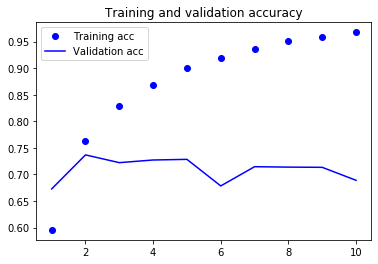

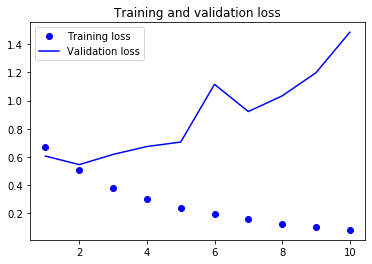

In [20]:
plot_history(history)

Now train the embedding and the dense layers jointly.

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 8s 405us/step - loss: 0.6357 - acc: 0.6914 - val_loss: 0.4270 - val_acc: 0.8066
Epoch 2/10
20000/20000 [==============================] - 8s 377us/step - loss: 0.2969 - acc: 0.8763 - val_loss: 0.3869 - val_acc: 0.8310
Epoch 3/10
20000/20000 [==============================] - 8s 389us/step - loss: 0.1647 - acc: 0.9372 - val_loss: 0.4068 - val_acc: 0.8458
Epoch 4/10
20000/20000 [==============================] - 8s 389us/step - loss: 0.0799 - acc: 0.9716 - val_loss: 0.5541 - val_acc: 0.8448
Epoch 5/10
20000/20000 [==============================] - 8s 378us/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.7259 - val_acc: 0.8218
Epoch 6/10
20000/20000 [==============================] - 8s 382us/step - loss: 0.0141 - acc: 0.9962 - val_loss: 0.8091 - val_acc: 0.8518
Epoch 7/10
20000/20000 [==============================] - 8s 388us/step - loss: 0.0069 - acc: 0.9981 - val_loss: 0.9250 - v

Let's plot its performance over time:

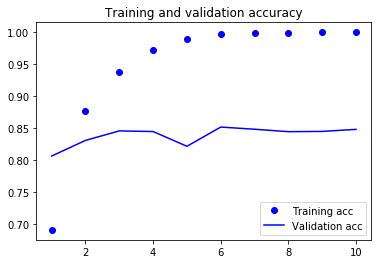

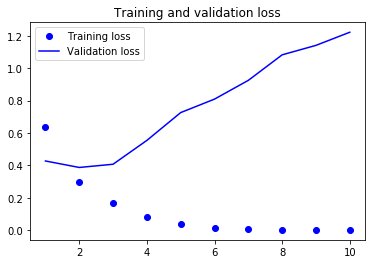

In [22]:
plot_history(history)

In [23]:
embedding_matrix1 = model.layers[0].get_weights()[0]

Now we train the embedding and the LSTM layers jointly.

In [24]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 113s 6ms/step - loss: 0.4753 - acc: 0.7721 - val_loss: 0.3265 - val_acc: 0.8670
Epoch 2/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.2745 - acc: 0.8899 - val_loss: 0.2879 - val_acc: 0.8848
Epoch 3/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.2090 - acc: 0.9208 - val_loss: 0.2738 - val_acc: 0.9014
Epoch 4/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.1705 - acc: 0.9374 - val_loss: 0.2519 - val_acc: 0.9034
Epoch 5/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.1420 - acc: 0.9499 - val_loss: 0.2595 - val_acc: 0.9002
Epoch 6/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.1174 - acc: 0.9581 - val_loss: 0.2976 - val_acc: 0.8932
Epoch 7/10
20000/20000 [==============================] - 113s 6ms/step - loss: 0.0953 - acc: 0.9681 - val_loss: 0.2879 - v

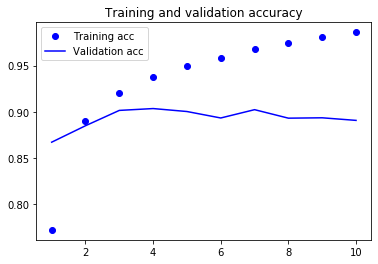

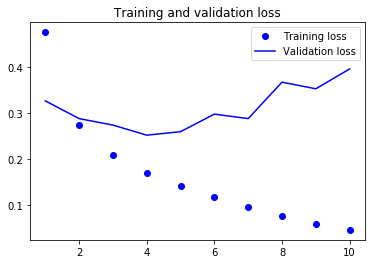

In [25]:
plot_history(history)

In [26]:
embedding_matrix2 = model.layers[0].get_weights()[0]

In [27]:
embedding_matrix2.shape

(10000, 100)

Implement the following three functions that measure the distance between words in the three different embeddings.

In [28]:
def word_dist(word1, word2, embedding_matrix):
    # fill in your code here
    index1 = word_index[word1]
    index2 = word_index[word2]
    return np.linalg.norm(embedding_matrix[index1] - embedding_matrix[index2])

def dist_glove(word1, word2):
    return word_dist(word1, word2, embedding_matrix)

def dist_dense(word1, word2):
    return word_dist(word1, word2, embedding_matrix1)

def dist_LSTM(word1, word2):
    return word_dist(word1, word2, embedding_matrix2)

Observe the following reults and check whether dense embedding and LSTM embedding are better than the glove embedding on these results.

In [29]:
print(dist_glove('better', 'worse') < dist_glove('worst', 'worse'))
print(dist_dense('better', 'worse') < dist_dense('worst', 'worse'))
print(dist_LSTM('better', 'worse') < dist_LSTM('worst', 'worse'))

True
False
False


In [30]:
print(dist_glove('good', 'bad') < dist_glove('poor', 'bad'))
print(dist_dense('good', 'bad') < dist_dense('poor', 'bad'))
print(dist_LSTM('good', 'bad') < dist_LSTM('poor', 'bad'))

True
False
False


In [31]:
print(dist_glove('bad', 'good') < dist_glove('great', 'good'))
print(dist_dense('bad', 'good') < dist_dense('great', 'good'))
print(dist_LSTM('bad', 'good') < dist_LSTM('great', 'good'))

True
False
False


In [32]:
print(dist_glove('clever', 'clumsy') < dist_glove('clever', 'ingenious'))
print(dist_dense('clever', 'clumsy') < dist_dense('clever', 'ingenious'))
print(dist_LSTM('clever', 'clumsy') < dist_LSTM('clever', 'ingenious'))

True
False
False


Find the nearest neighhor of a word for the three embeddings.

In [33]:
def NN_general(word, embedding_matrix):
    # fill in your code here
    mini = np.inf
    neighbor = ""
    for new_word in L_POS + L_NEG:
      if new_word != word:
        dist = word_dist(word, new_word, embedding_matrix)
        if dist < mini:
          mini = dist
          neighbor = new_word
    return neighbor
    
def NN_LSTM(word):
    return NN_general(word, embedding_matrix2)

def NN_dense(word):
    return NN_general(word, embedding_matrix1)

def NN_glove(word):
    return NN_general(word, embedding_matrix)

List of all the words that the nearest neighbor changes in the LSTM embedding, while its nearest neighbor does not change in the dense embedding.

In [34]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_glove(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_LSTM(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: accessible available convenient
:::: admirer ironically avid
:::: advanced integrated improved
:::: appreciated impressed appreciate
:::: authentic wholesome genuine
:::: avid passionate admirer
:::: beautifully brilliantly wonderfully
:::: best good well
:::: blessing welcome divine
:::: blockbuster hallmark smash
:::: boost helped improve
:::: breakthrough progress success
:::: celebration celebrated celebrate
:::: confident optimistic satisfied
:::: consistent solid inconsistent
:::: convenient useful easier
:::: cool warm hot
:::: courage bravery honesty
:::: crisp cool delicious
:::: dashing spirited hapless
:::: dawn breaking darkness
:::: delicate intricate complicated
:::: divine heavenly blessing
:::: eagerly thrilled happily
:::: encourage enhance helping
:::: endearing likable captivating
:::: energetic playful spirited
:::: enlightenment inspiration perfection
:::: fabulous wonderful marvelous
:::: fantastically amazingly excellently
:::: fiery passionate spirited
::::

List of the words that its nearest neighbor changes in the dense embedding, while the nearest neighbor does not change in the LSTM embedding.

In [35]:
count = 0
for word in L_POS + L_NEG:
    if NN_dense(word) != NN_glove(word) and NN_LSTM(word) == NN_glove(word):
        print('::::', word, NN_dense(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: ambitious innovative promising
:::: balanced consistent sensible
:::: compassionate humble sober
:::: decent lousy respectable
:::: dedicated well works
:::: delightfully stunningly wonderfully
:::: destiny glory greatness
:::: distinctive unusual peculiar
:::: elevate distract impress
:::: empathy disdain compassion
:::: enhance enhanced improve
:::: exciting fascinating interesting
:::: fairly reasonably remarkably
:::: fame glory talent
:::: famed renowned legendary
:::: feat accomplishment accomplished
:::: finest magnificent splendid
:::: fresh unexpected hot
:::: genuine authentic regard
:::: glamorous flashy stylish
:::: glory greatness triumph
:::: homage parody beloved
:::: honest truthful straightforward
:::: honesty modesty clarity
:::: humorous comical amusing
:::: important well significant
:::: intriguing fascinating interesting
:::: likable lovable endearing
:::: luck misfortune unfortunately
:::: meaningful regard genuine
:::: modern well works
:::: modest respecta

In [36]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_dense(word) and NN_dense(word) != NN_glove(word) and NN_LSTM(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: afford willing prefer lose
:::: available limited well accessible
:::: beauty obsession gorgeous beautiful
:::: clearly clear concerned doubt
:::: clever clumsy ingenious straightforward
:::: contribution benefit achievement exceptional
:::: conveniently cleverly oblivious sadly
:::: convincing unconvincing proving spite
:::: finely preferably coarse beautifully
:::: flashy stylish glamorous classy
:::: free well clear right
:::: futuristic cartoonish stylish surreal
:::: genius obsession greatness inspiration
:::: glee delight delirious maniacal
:::: glow glowing faint bright
:::: goodness perfection wisdom greatness
:::: healthy better good decent
:::: heavenly heaven divine magical
:::: hilarious amusing captivating comical
:::: intelligence critical unclear terror
:::: intimate fascinating entertaining lively
:::: kudos liking compliment thrills
:::: lavish fancy flashy glamorous
:::: loving passionate wise happy
:::: loyalty affection honesty respect
:::: marvelous wondrous t

Get the list of words that dense embedding and LSTM embedding agree on the nearest neighbor but do not agree with the glove embedding.

In [37]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abundance peculiar immense immense
:::: accomplishment remarkable accomplished accomplished
:::: admirably excellently masterfully masterfully
:::: amusing hilarious comical comical
:::: appropriate proper effective effective
:::: believable contrived captivating captivating
:::: beloved loved legendary legendary
:::: better good enough enough
:::: bliss idiocy madness madness
:::: bloom hardy frost frost
:::: bravo knock bliss bliss
:::: brilliance originality dazzling dazzling
:::: celebrate celebration celebrated celebrated
:::: cheer delight cry cry
:::: clarity originality honesty honesty
:::: comfortable easy enjoying enjoying
:::: commitment promise respect respect
:::: compassion empathy kindness kindness
:::: consistently clearly consistent consistent
:::: coolest scariest strangest strangest
:::: darling wise crook crook
:::: ease concerns spite spite
:::: ecstasy addict addicted addicted
:::: entertains betrays excels excels
:::: excellent terrific superb superb
:::: ex

Get the list of words that glove, dense, LSTM embeddings all agree on the nearest neighbor.

In [38]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abound wonders wonders wonders
:::: acclaim praise praise praise
:::: acclaimed renowned renowned renowned
:::: accomplish accomplished accomplished accomplished
:::: accomplished accomplishment accomplishment accomplishment
:::: accurate precise precise precise
:::: accurately correctly correctly correctly
:::: achievement achievements achievements achievements
:::: achievements achievement achievement achievement
:::: adequate sufficient sufficient sufficient
:::: admirable commendable commendable commendable
:::: admiration affection affection affection
:::: admire appreciate appreciate appreciate
:::: adorable cute cute cute
:::: adore despise despise despise
:::: advantage gain gain gain
:::: adventurous imaginative imaginative imaginative
:::: affection admiration admiration admiration
:::: amazed thrilled thrilled thrilled
:::: amazing incredible incredible incredible
:::: amazingly astonishingly astonishingly astonishingly
:::: ample sufficient sufficient sufficient
:::: a

## Visualization of the three embeddings. We want to see how the positive words and negative words are spreaded in two dimensional space.

In [39]:
emb_glove = []
emb_dense = []
emb_LSTM = []
for word in L_POS + L_NEG:
    emb = embedding_matrix[word_index[word]]
    emb_glove.append(emb)
    emb = embedding_matrix1[word_index[word]]
    emb_dense.append(emb)
    emb = embedding_matrix2[word_index[word]]
    emb_LSTM.append(emb)

In [40]:
emb_glove = np.array(emb_glove)
emb_dense = np.array(emb_dense)
emb_LSTM = np.array(emb_LSTM)

In [41]:
emb_glove.shape, emb_dense.shape, emb_LSTM.shape

((1869, 100), (1869, 100), (1869, 100))

In [42]:
import numpy as np
from sklearn.manifold import TSNE
X_LSTM = TSNE(n_components=2).fit_transform(emb_LSTM)

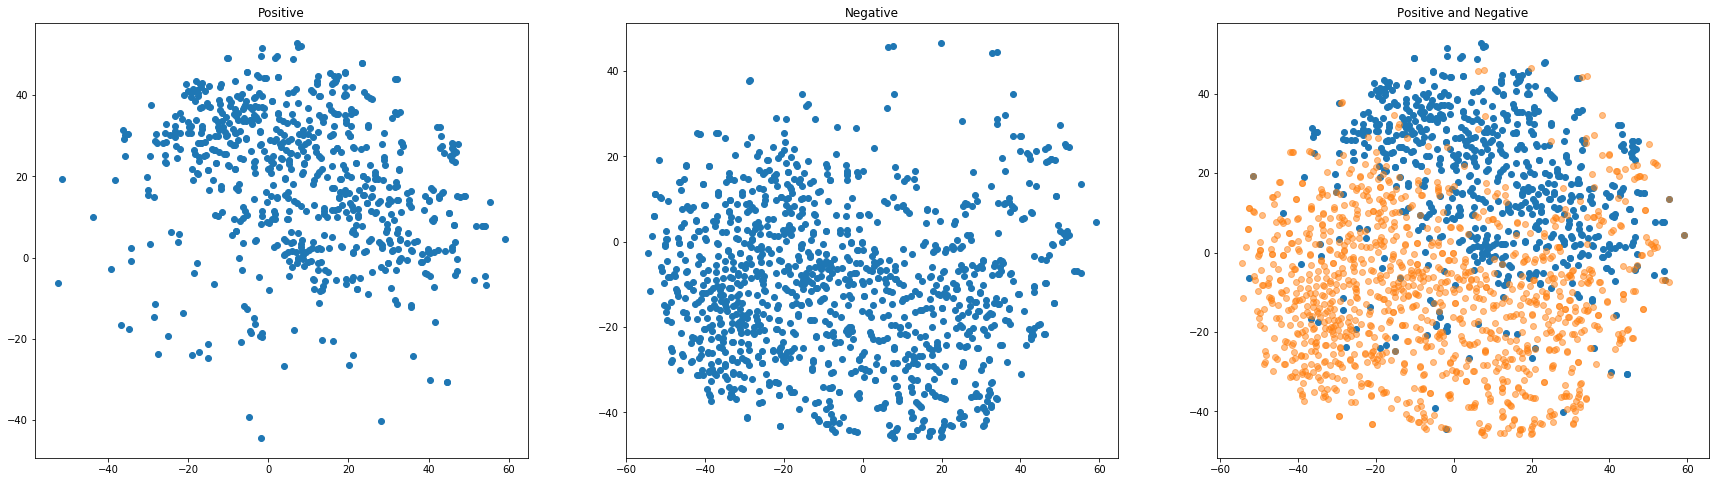

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [44]:
import numpy as np
from sklearn.manifold import TSNE
X_dense = TSNE(n_components=2).fit_transform(emb_dense)

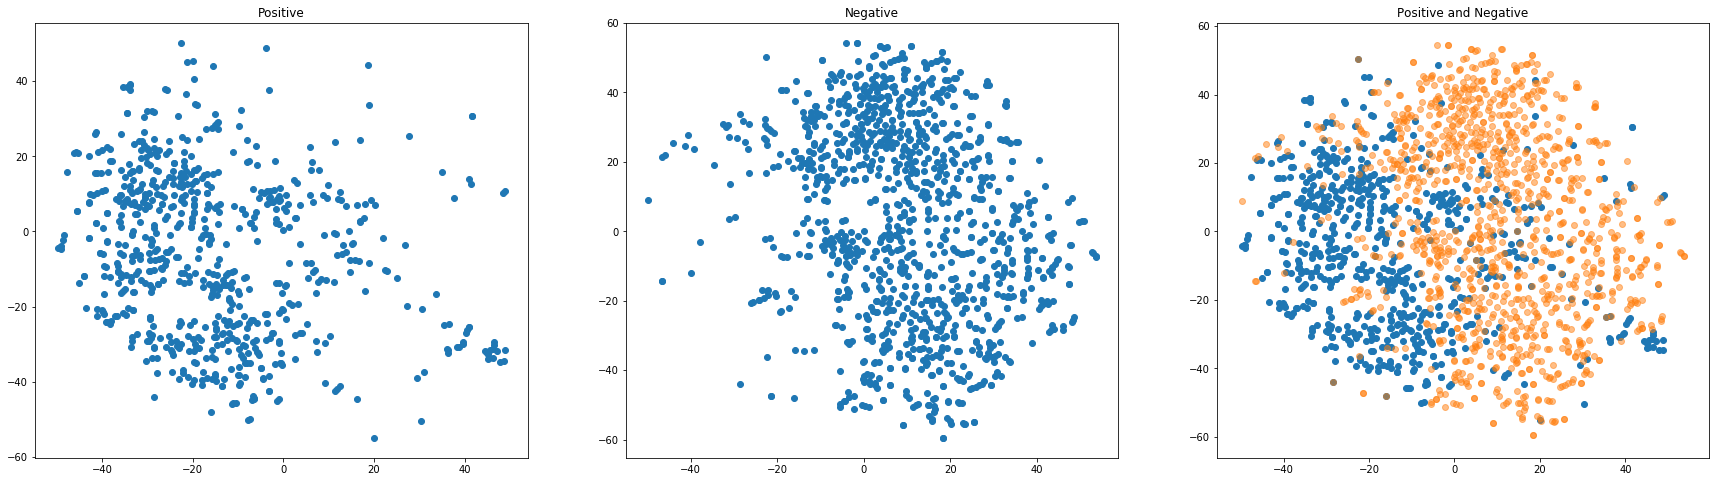

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [46]:
import numpy as np
from sklearn.manifold import TSNE
X_glove = TSNE(n_components=2).fit_transform(emb_glove)

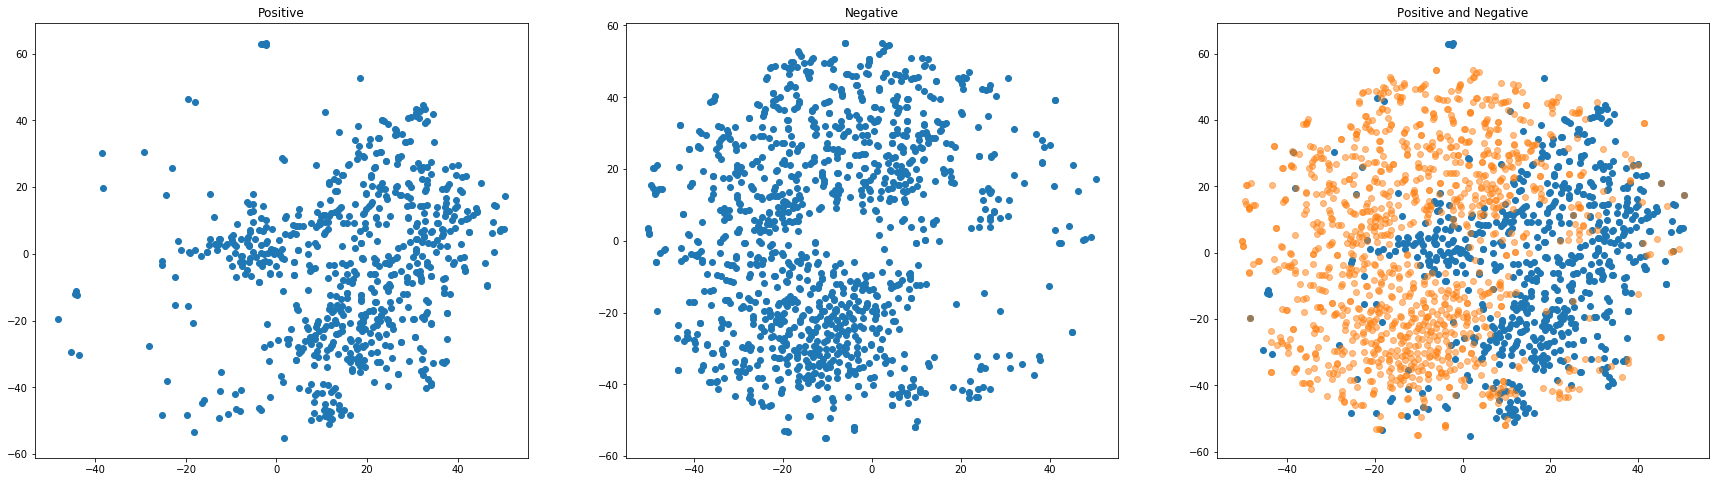

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

Next we implement the class distance function for the three embeddings.

In [48]:
def class_dist(L_POS, L_NEG, embedding_matrix):
    # fill in your code here
    # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
    # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
    # We return d12/d as the result
    total = 0
    subtotal = 0
    for p_word in L_POS:
      for n_word in L_NEG:
        dist = word_dist(p_word, n_word, embedding_matrix)
        subtotal += dist
      subtotal = subtotal / len(L_NEG)
      total += subtotal

    d12 = total / len(L_POS)
    total = 0
    subtotal = 0
    for word in L_POS + L_NEG:
      for inner in L_POS + L_NEG:
        if word != inner:
          dist = word_dist(word, inner, embedding_matrix)
          subtotal += dist
      subtotal = subtotal / len(L_POS + L_NEG)
      total += subtotal
    d = total / len(L_POS + L_NEG)
    return d12/d

def class_dist_glove():
    return class_dist(L_POS, L_NEG, embedding_matrix)

def class_dist_dense():
    return class_dist(L_POS, L_NEG, embedding_matrix1)

def class_dist_LSTM():
    return class_dist(L_POS, L_NEG, embedding_matrix2)

d_glove = class_dist_glove()
d_dense = class_dist_dense()
d_LSTM = class_dist_LSTM()

In [49]:
print(d_glove, d_dense, d_LSTM)
print("Relative improvments:")
print("Dense:", (d_dense-d_glove)/d_glove*100)
print("LSTM:", (d_LSTM-d_glove)/d_glove*100)

1.0172961411853294 1.0251083696211256 1.0207222769692774
Relative improvments:
Dense: 0.7679404373532357
LSTM: 0.3367884380212002


Now we double check the chosen embedding is indeeded better. We use the chosen embedding and LSTM model and check whether the valdidation accuracy is better.

In [50]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 96s 5ms/step - loss: 0.3505 - acc: 0.8533 - val_loss: 0.3207 - val_acc: 0.8734
Epoch 2/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.2607 - acc: 0.8986 - val_loss: 0.2731 - val_acc: 0.8940
Epoch 3/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.2283 - acc: 0.9110 - val_loss: 0.2923 - val_acc: 0.8856
Epoch 4/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.2130 - acc: 0.9163 - val_loss: 0.2873 - val_acc: 0.8794
Epoch 5/10
20000/20000 [==============================] - 99s 5ms/step - loss: 0.2000 - acc: 0.9219 - val_loss: 0.3023 - val_acc: 0.8882
Epoch 6/10
20000/20000 [==============================] - 98s 5ms/step - loss: 0.1901 - acc: 0.9252 - val_loss: 0.2765 - val_acc: 0.8986
Epoch 7/10
20000/20000 [==============================] - 98s 5ms/step - loss: 0.1832 - acc: 0.9280 - val_loss: 0.2622 - val_acc:

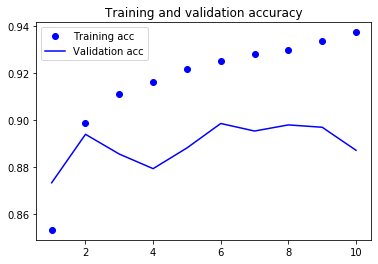

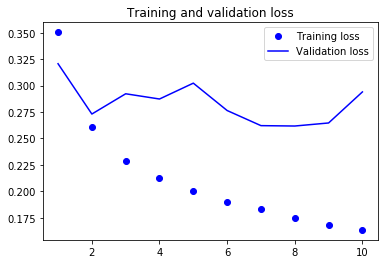

In [51]:
plot_history(history)

In [52]:
from keras import backend as K 

K.clear_session()

In [53]:
from keras import layers
import keras

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Bidirectional(LSTM(32, return_sequences = True)))
model.add(layers.Conv1D(64, 7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 64)           34048     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 64)           28736     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [54]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D.h5', monitor='val_acc', save_best_only=True,)]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, shuffle=True,
                    epochs=200,
                    batch_size=64,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/200
20000/20000 [==============================] - 103s 5ms/step - loss: 0.2921 - acc: 0.8738 - val_loss: 0.2678 - val_acc: 0.8954
Epoch 2/200
20000/20000 [==============================] - 98s 5ms/step - loss: 0.2183 - acc: 0.9141 - val_loss: 0.3035 - val_acc: 0.8754
Epoch 3/200
20000/20000 [==============================] - 95s 5ms/step - loss: 0.1960 - acc: 0.9223 - val_loss: 0.2758 - val_acc: 0.8956
Epoch 4/200
20000/20000 [==============================] - 95s 5ms/step - loss: 0.1823 - acc: 0.9275 - val_loss: 0.2504 - val_acc: 0.9014
Epoch 5/200
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1682 - acc: 0.9345 - val_loss: 0.2526 - val_acc: 0.9038
Epoch 6/200
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1510 - acc: 0.9411 - val_loss: 0.2490 - val_acc: 0.9004
Epoch 7/200
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1298 - acc: 0.9506 - val_loss: 0.2739 - 

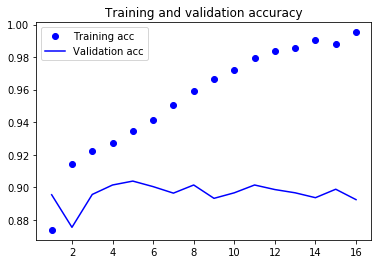

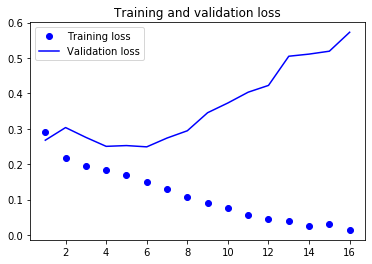

In [55]:
plot_history(history)

In [56]:
model = keras.models.load_model('LSTM_Conv1D.h5')
model.layers[0].trainable = True
for i in range(1, len(model.layers)):
    model.layers[i].trainable = False

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 64)           34048     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 64)           28736     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [57]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain.h5', monitor='val_acc', save_best_only=True,)]


history = model.fit(x_train, y_train, shuffle=True,
                    epochs=200,
                    batch_size=64,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/200
20000/20000 [==============================] - 128s 6ms/step - loss: 0.1337 - acc: 0.9487 - val_loss: 0.2495 - val_acc: 0.9044
Epoch 2/200
20000/20000 [==============================] - 127s 6ms/step - loss: 0.1001 - acc: 0.9673 - val_loss: 0.2523 - val_acc: 0.9038
Epoch 3/200
20000/20000 [==============================] - 122s 6ms/step - loss: 0.0760 - acc: 0.9787 - val_loss: 0.2586 - val_acc: 0.9024
Epoch 4/200
20000/20000 [==============================] - 121s 6ms/step - loss: 0.0598 - acc: 0.9869 - val_loss: 0.2672 - val_acc: 0.9040
Epoch 5/200
20000/20000 [==============================] - 116s 6ms/step - loss: 0.0468 - acc: 0.9916 - val_loss: 0.2750 - val_acc: 0.9034
Epoch 6/200
20000/20000 [==============================] - 116s 6ms/step - loss: 0.0374 - acc: 0.9944 - val_loss: 0.2843 - val_acc: 0.9042
Epoch 7/200
20000/20000 [==============================] - 116s 6ms/step - loss: 0.0292 - acc: 0.9973 - val_loss: 0.2

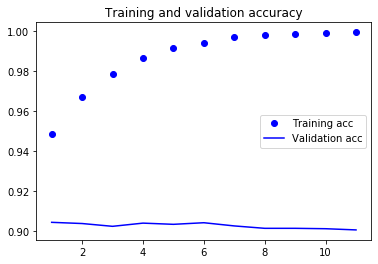

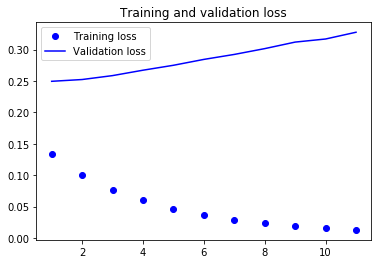

In [58]:
plot_history(history)

Now we load the best model. And then we evaluate the model using the test data.

In [59]:
model = keras.models.load_model('LSTM_Conv1D_retrain.h5')

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [60]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [61]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 36s 1ms/step


[0.24142220156282188, 0.9037600159645081]

We did beat the 90% of accuracy. Pay attention to the tecniques we used to achieve this goal. To save time, I only showed one model above. In fact, I tried many different models and optimizers. A few of these combinations should be able to beat 90% of accuracy. The above is the one I think that is most promising. The model is also realtively simple.